In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:

df = pd.read_excel("C:/Users/Yoges/Downloads/CTG.xls", sheet_name = 'Data', skiprows=[0])
df.head()


,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [7]:
#finding null values
df.isnull().sum()

b                 3
e                 3
AC                3
FM                2
UC                2
DL                1
DS                1
DP                1
DR                1
Unnamed: 9     2129
LB                3
AC.1              3
FM.1              2
UC.1              2
DL.1              1
DS.1              1
DP.1              1
ASTV              2
MSTV              2
ALTV              2
MLTV              2
Width             3
Min               3
Max               3
Nmax              3
Nzeros            3
Mode              3
Mean              3
Median            3
Variance          3
Tendency          3
Unnamed: 31    2129
A                 2
B                 2
C                 2
D                 2
E                 2
AD                2
DE                2
LD                2
FS                2
SUSP              2
Unnamed: 42    2129
CLASS             3
Unnamed: 44    2129
NSP               3
dtype: int64

In [8]:
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

Missing values:
b                 3
e                 3
AC                3
FM                2
UC                2
DL                1
DS                1
DP                1
DR                1
Unnamed: 9     2129
LB                3
AC.1              3
FM.1              2
UC.1              2
DL.1              1
DS.1              1
DP.1              1
ASTV              2
MSTV              2
ALTV              2
MLTV              2
Width             3
Min               3
Max               3
Nmax              3
Nzeros            3
Mode              3
Mean              3
Median            3
Variance          3
Tendency          3
Unnamed: 31    2129
A                 2
B                 2
C                 2
D                 2
E                 2
AD                2
DE                2
LD                2
FS                2
SUSP              2
Unnamed: 42    2129
CLASS             3
Unnamed: 44    2129
NSP               3
dtype: int64


In [9]:
df.shape

(2129, 46)

<AxesSubplot:>

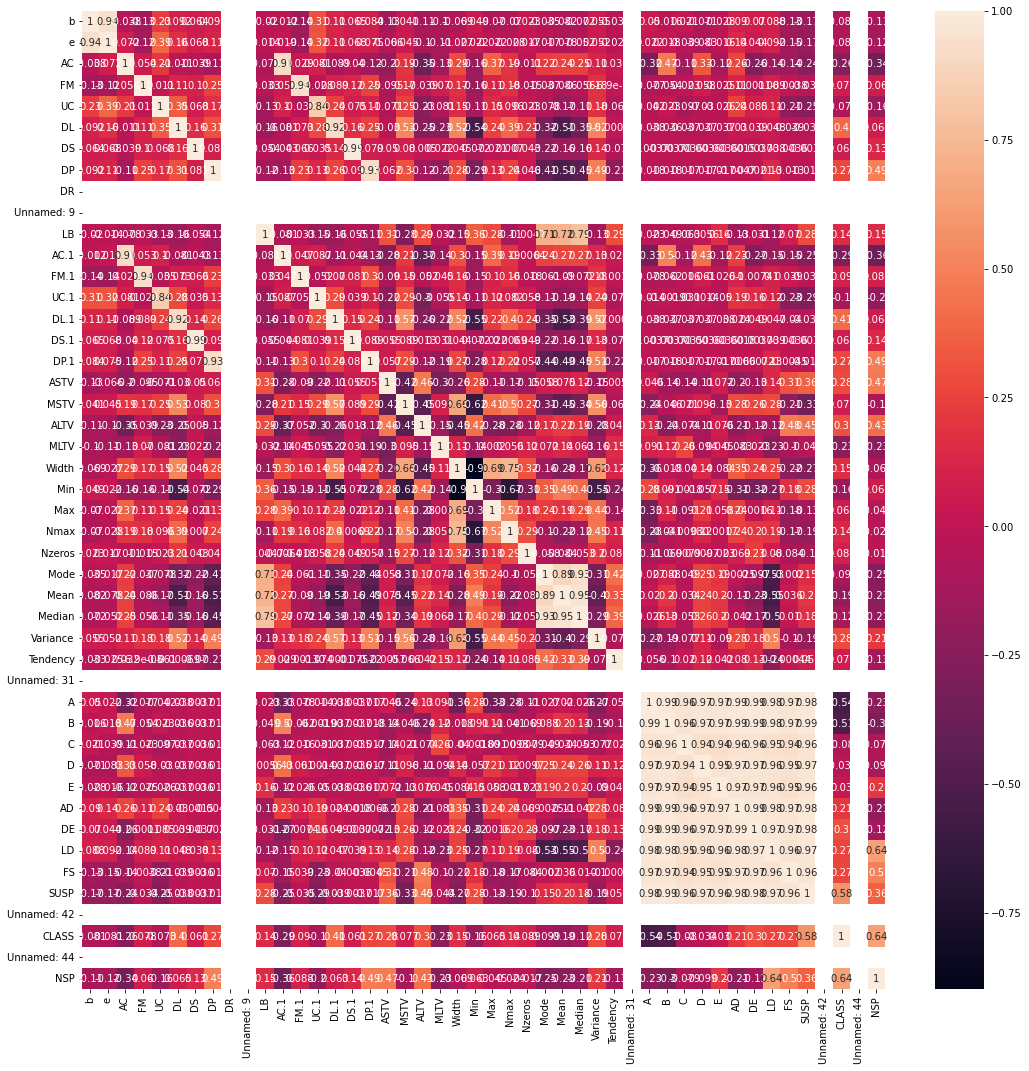

In [10]:
plt.subplots(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True)

In [11]:
correlated_features = set()
correlation_matrix = df.corr()

In [12]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [13]:
len(correlated_features)

21

In [14]:
print(correlated_features)

{'DL.1', 'Mean', 'E', 'DS.1', 'SUSP', 'DE', 'UC.1', 'LD', 'Mode', 'D', 'FM.1', 'Nmax', 'Min', 'Median', 'B', 'FS', 'DP.1', 'C', 'e', 'AC.1', 'AD'}


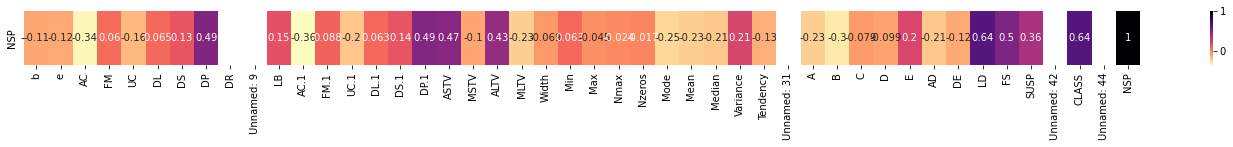

In [28]:
plt.subplots(figsize=(25,1))
sns.heatmap(correlation_matrix.sort_values(by=["NSP"], ascending=False).head(1),annot=True, cmap="magma_r")
plt.show()

In [17]:

print('Checking how imbalance is the dataset:')
print(df['NSP'].value_counts())

Checking how imbalance is the dataset:
1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64


In [18]:
print(df.duplicated().sum())
print('Labels counts duplicate: ')
print(df.loc[df.duplicated(), 'NSP'].value_counts())



10
Labels counts duplicate: 
1.0    7
2.0    2
3.0    1
Name: NSP, dtype: int64


In [22]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# after removing duplicates again check how imbalance the dataset is:
print('Checking how imbalance is the dataset after removing duplicates:')
print(df['NSP'].value_counts())

Checking how imbalance is the dataset after removing duplicates:
1.0    1648
2.0     293
3.0     175
Name: NSP, dtype: int64


In [26]:

df_raw = ['LB', 'AC', 'FM',
       'UC', 'DL', 'DS',
       'DP', 'ASTV',
       'MSTV',
       'ALTV',
       'MLTV', 'Width',
       'Min', 'Max', 'Nmax',
       'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency']


X =  pd.DataFrame(df, columns = df_raw)


X

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0
2125,142.0,1.0,1.0,5.0,0.0,0.0,0.0,74.0,0.4,36.0,...,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_standardized = z_score(X)

df_standardized

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,-1.352719,-0.765498,-0.192438,-1.280651,-0.628052,-0.061560,-0.271670,1.510365,-0.937936,1.799802,...,-0.166338,-1.068965,-2.122293,-0.702859,-0.459646,-1.064414,0.153724,-1.180576,1.864474,1.114497
1,-0.132879,0.356243,-0.192438,0.110390,0.165159,-0.061560,-0.271670,-1.744089,0.854637,-0.534402,...,1.525830,-0.865940,1.890559,0.652574,0.954032,0.216376,0.089642,0.132068,-0.237130,-0.522058
2,-0.031226,-0.204628,-0.192438,0.458150,0.165159,-0.061560,-0.271670,-1.802204,0.854637,-0.534402,...,1.525830,-0.865940,1.890559,0.313716,0.954032,0.216376,0.025560,-0.006105,-0.202677,-0.522058
3,0.070427,-0.204628,-0.192438,0.805910,0.165159,-0.061560,-0.271670,-1.802204,1.190744,-0.534402,...,1.192524,-1.373501,0.330006,2.346865,-0.459646,-0.027584,-0.038522,-0.075192,-0.202677,1.114497
4,-0.132879,0.356243,-0.192438,0.458150,-0.628052,-0.061560,-0.271670,-1.802204,1.190744,-0.534402,...,1.192524,-1.373501,0.330006,1.669149,-0.459646,-0.027584,0.089642,-0.006105,-0.271582,1.114497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.680347,-0.485063,-0.192438,1.849191,-0.628052,-0.061560,-0.271670,1.800941,-1.049972,0.931261,...,-0.115060,0.318369,0.274272,0.652574,-0.459646,0.887266,0.794542,0.892019,-0.512750,1.114497
2125,0.883653,-0.485063,-0.166875,0.458150,-0.628052,-0.061560,-0.271670,1.568480,-1.049972,1.419815,...,-0.730394,0.792093,-0.283069,-0.702859,0.954032,0.460336,0.538215,0.477500,-0.616107,-0.522058
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,-0.628052,-0.061560,-0.271670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
